## Vision par ordinateur et Filtres d'Image

La vision par ordinateur utilise des programmes informatiques pour traiter des données d'image, incluant les filtres et noyaux d'image.

**Bases des filtres d'image**

Les filtres, ou noyaux, sont de petites matrices appliquées à une image entière, modifiant les pixels par des opérations mathématiques.

**Application des filtres**

En appliquant un filtre, on le fait glisser sur l'image, multipliant les valeurs des pixels par les poids du filtre, créant ainsi une nouvelle image transformée.

<img src="principe-convolution.jpg" width="50%">

**Fonctionnement des convolutions**

La convolution, processus d'application des filtres, est utilisée par les réseaux de neurones convolutifs (CNN) pour ajuster automatiquement les poids des filtres lors de la classification d'images.

Voir en live les filtres: [https://setosa.io/ev/image-kernels/](https://setosa.io/ev/image-kernels/)

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


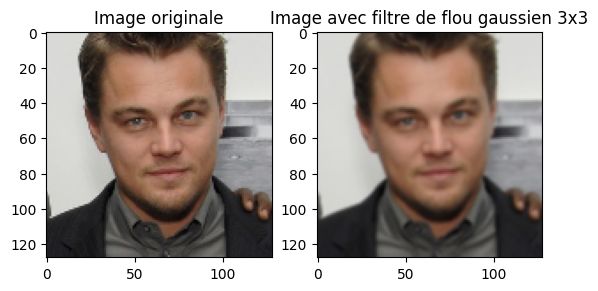

In [28]:
# Charger une image
image = cv2.imread('test.jpg')
image = cv2.resize(image, (128, 128))

# Définir le noyau de convolution pour le flou gaussien (kernel 3x3)
kernel_blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125, 0.25, 0.125],
    [0.0625, 0.125, 0.0625]
], dtype=np.float32)

print(kernel_blur)

# Appliquer le filtre de convolution
image_blurred = cv2.filter2D(image, -1, kernel_blur)

# Afficher l'image originale et l'image avec le filtre de flou
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Image originale')
plt.subplot(122), plt.imshow(cv2.cvtColor(image_blurred, cv2.COLOR_BGR2RGB)), plt.title('Image avec filtre de flou gaussien 3x3')
plt.show()

In [24]:
# Prenez le premier bloc 3x3 de pixels de l'image
first_block = image[0:3, 0:3]

# Appliquez le noyau de convolution au bloc pour chaque canal de couleur
output_pixel = np.empty(3)
for i in range(3):
    output_pixel[i] = np.sum(first_block[:, :, i] * kernel_blur)

print("R après filtre:", output_pixel[0])
print("G après filtre:", output_pixel[1])
print("B après filtre:", output_pixel[2])

R: 215.0
G: 217.0
B: 217.0


[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


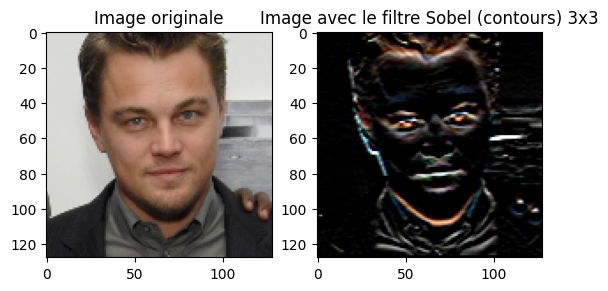

In [29]:
# Définir le noyau de convolution pour le flou gaussien (kernel 3x3)
kernel_sobel = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
], dtype=np.float32)

print(kernel_sobel)

# Appliquer le filtre de convolution
image_sobel = cv2.filter2D(image, -1, kernel_sobel)

# Afficher l'image originale et l'image avec le filtre de flou
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Image originale')
plt.subplot(122), plt.imshow(cv2.cvtColor(image_sobel, cv2.COLOR_BGR2RGB)), plt.title('Image avec le filtre Sobel (contours) 3x3')
plt.show()

### Padding

Lorsque vous appliquez un filtre de convolution à une image, le filtre se déplace à travers l'image en multipliant ses valeurs par les valeurs des pixels de l'image et en sommant le résultat. Pour les pixels situés près des bords de l'image, il peut y avoir un problème si le filtre dépasse les limites de l'image. Le padding résout ce problème en ajoutant des pixels autour de l'image pour créer une "bordure" artificielle.

La convolution peut perdre des informations le long des bords. Le rembourrage (padding), ajouté souvent sous forme de valeurs nulles, préserve la taille de l'image et les informations sur les bords.

<img src="padding.jpg" width="75%">


### Stride

Le "stride" (pas ou décalage en français) est un autre paramètre important lors de l'application de filtres de convolution à une image. Il spécifie le nombre de pixels par lesquels le filtre se déplace à chaque étape lors de la convolution.

Lorsque le filtre se déplace avec un stride de 1, il se déplace d'un pixel à la fois. Si le filtre a une taille de 3x3, par exemple, il se déplace d'un pixel à droite, puis d'un pixel vers le bas.

Si le stride est augmenté, le filtre se déplace avec des intervalles plus grands. Un stride de 2 signifie que le filtre saute deux pixels à chaque étape. Cela réduit la résolution spatiale de la sortie et peut entraîner une perte d'informations.

L'utilisation d'un stride plus grand peut réduire le temps de calcul et la taille de la sortie, mais elle peut également entraîner une perte d'informations, en particulier le long des bords de l'image.

<img src="stride.jpg" width="75%">

# Couches de Convolution et de Pooling

**Problèmes avec les réseaux classiques**

Les réseaux neuronaux classiques (l'ANN) présentent des problèmes pour les données d'image en raison du grand nombre de paramètres requis et de la perte d'informations spatiales lors de l'aplatissement (flatten).

<img src="ann-problem.jpg" width="50%">

**Solution : Couche de Convolution**

Les CNN (réseaux neuronaux convolutionnels) utilisent une couche de convolution pour analyser les images. Cette couche applique différents filtres d'image aux zones locales de l'image, ce qui permet de réduire le nombre total de paramètres du réseau. L'objectif est de se concentrer sur des connexions locales et de reconnaître des motifs spécifiques.

Plus en détail, la couche de convolution fonctionne en établissant des connexions locales entre les neurones. Chaque neurone n'est connecté qu'à un petit groupe de neurones voisins dans la couche suivante. Ces connexions locales forment ce que l'on appelle des filtres. Ces filtres sont des matrices de poids qui sont ajustées pendant l'entraînement du réseau pour apprendre à reconnaître des caractéristiques spécifiques de l'image.

En résumé, la couche de convolution permet au CNN de détecter des motifs locaux dans l'image en utilisant des filtres adaptatifs, ce qui contribue à améliorer la capacité du réseau à comprendre les caractéristiques importantes des données visuelles.

Exemple sur une dimension 1D:

<img src="ann-connexion.jpg" width="50%">

<img src="cnn-connexion.jpg" width="50%">

Exemple sur une dimension 2D (4 x 3 pixels) sur une image noir et blanc:

Création du filtre 1 avec un stride de 2:

<img src="cnn-connexion-1.jpg" width="50%">

Création du filtre 2:

<img src="cnn-connexion-2.jpg" width="50%">

Création du filtre 3:

<img src="cnn-connexion-3.jpg" width="50%">

Ce qui nous donne notre layer de convolution:

<img src="cnn-connexion-4.jpg" width="50%">

La couche de convolution dans les CNN est utilisée pour comprendre les caractéristiques des images. Pour les images en niveaux de gris, cette couche conserve l'information bidimensionnelle en appliquant des filtres sur l'image. Ces filtres forment des connexions locales empilées pour créer la couche de convolution, aidant ainsi le réseau à détecter des motifs spécifiques.

En ce qui concerne les images en couleur, elles sont traitées comme des tenseurs tridimensionnels avec des canaux pour le rouge, le vert et le bleu. Les filtres de convolution deviennent donc tridimensionnels, avec un filtre pour chaque canal de couleur. Cela permet au réseau de comprendre les caractéristiques des images en couleur en considérant chaque composant de couleur de manière distincte.

<img src="cnn-connexion-5.jpg" width="50%">

**Empilement de couches de convolution**

Plusieurs couches de convolution peuvent être empilées, permettant au réseau de découvrir des motifs complexes dans les motifs déjà détectés par les couches précédentes.



## Couches de Pooling dans les Réseaux Neuronaux Convolutifs


Malgré la connectivité locale dans les couches de convolution et l'utilisation potentielle de nombreux filtres pour les images en couleur, le réseau est toujours confronté à un défi en raison d'un nombre élevé de paramètres. Les couches de pooling interviennent en réduisant ce nombre de paramètres.

Les couches de pooling sont utilisées après les couches de convolution. Le processus consiste à prendre la sortie d'une couche de convolution et à la faire passer à travers une couche de pooling. Cela aide à réduire la taille des tenseurs produits par les couches de convolution, rendant le réseau plus gérable.

<img src="pooling-layer.jpg" width="50%">

**Exemple de Max Pooling**

Considérons un filtre 4x4 d'une couche de convolution. Pour réduire sa taille, nous appliquons le max pooling. Une fenêtre 2x2 avec un décalage de 2 se déplace sur le filtre, sélectionnant la valeur maximale dans chaque fenêtre. Cela réduit la taille du filtre tout en conservant les informations essentielles. Le max pooling est une méthode efficace pour réduire les paramètres.

<img src="pooling-layer-1.jpg" width="50%">

**Exemple de Average Pooling**

Une autre technique de pooling est le average pooling, où au lieu de sélectionner la valeur maximale, nous faisons la moyenne des valeurs dans la fenêtre de pooling. Bien que cela réduise également les paramètres, le max pooling est plus couramment utilisé car il a tendance à préserver des caractéristiques plus importantes.

<img src="pooling-layer-2.jpg" width="50%">

Ce qui donne la réduction de paramètres suivant:

<img src="pooling-layer-3.jpg" width="50%">

**Couches de Pooling et Perte d'Information**

Les couches de pooling entraînent inévitablement une perte d'informations, car un petit noyau de pooling peut supprimer environ 75 % des données en entrée. Cependant, l'espoir est que les tendances et motifs essentiels restent intacts.

**Couche Dropout**

Pour résoudre les problèmes de temps d'entraînement et de surajustement, des couches de dropout sont souvent introduites. Pendant l'entraînement, des unités aléatoires sont désactivées, empêchant les neurones de trop dépendre de fonctionnalités spécifiques. Cela agit comme une technique de régularisation.

**Architectures Célèbres de CNN**

Plusieurs architectures CNN renommées, telles que Lenet-5, AlexNet, GoogLeNet et ResNet, existent. Ces architectures varient en taille, en ordre et en types de couches (convolution, pooling, entièrement connectée). Comprendre la théorie derrière les CNN permet d'interpréter efficacement ces architectures.

<img src="alexnet.jpg" width="50%">

**Conception des Architectures CNN**

La création d'une architecture CNN implique d'expérimenter avec différentes combinaisons de couches de convolution, de couches de pooling et de couches denses (entièrement connectées). Il n'y a pas d'approche unique, et la meilleure architecture est déterminée par l'expérimentation et les métriques d'évaluation.

<img src="cnn-arch.jpg" width="50%">

> FC = Fully connected network 